## Lista 4 - Macro 2

### Códigos da lista de exércicios resolvida para a cadeira de Macroeconomia 2 do curso de Economia - UFPE.

**Obs.:** Esse código serve de base para a utilização do *statsmodels.api* para fazer regressões OLS e gerar tabelas/gráficos com base nos resultados do modelo.

#### Questão 2

##### Letra a)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import numpy as np

In [ ]:
# Base de dados 
basespib = pd.read_excel('/content/drive/MyDrive/Lista 4 - macro 2/ipeadata[01-09-2022-10-36].xlsx')
basestri = pd.read_excel('/content/drive/MyDrive/Lista 4 - macro 2/ipeadata[01-09-2022-10-54].xlsx')

In [ ]:
# Arredondando as bases
basespib.round(4)

,Data,PIB - preços de mercado,consumo,capital fixo
0,1996 T1,99.5474,98.0462,96.5908
1,1996 T2,100.4375,100.9261,98.9914
2,1996 T3,104.3710,103.6824,102.4092
3,1996 T4,103.2998,109.1516,106.7408
4,1997 T1,104.3150,106.9472,108.3823
...,...,...,...,...
100,2021 T1,171.5379,179.1526,182.6963
101,2021 T2,171.1664,179.1408,174.8035
102,2021 T3,171.2752,180.6013,172.9203
103,2021 T4,172.4094,181.8932,174.2573


In [ ]:
basestri.round(4)

,Data,horas trabalhadas,Salário real,produção industrial
0,2011.01,110.1,106.5576,49.8
1,2011.02,112.0,109.6648,49.5
2,2011.03,109.6,111.0769,50.6
3,2011.04,110.8,114.7920,51.1
4,2011.05,111.4,117.0549,51.0
...,...,...,...,...
101,2019.06,84.4,90.3252,51.0
102,2019.07,82.6,89.4265,51.4
103,2019.08,83.5,88.9192,50.2
104,2019.09,82.3,90.0454,50.5


In [ ]:
basestri.columns= ["Data", "Horas", "Salário", "Produção"]
basespib.columns= ["Data", "PIB", "Consumo", "Capital"]

In [ ]:
# Corrigindo as datas
basespib["Data"] = pd.DatetimeIndex(basespib["Data"])

In [ ]:
basestri

,Data,Horas,Salário,Produção
0,2011.01,110.1,106.5576,49.8
1,2011.02,112.0,109.6648,49.5
2,2011.03,109.6,111.0769,50.6
3,2011.04,110.8,114.7920,51.1
4,2011.05,111.4,117.0549,51.0
...,...,...,...,...
101,2019.06,84.4,90.3252,51.0
102,2019.07,82.6,89.4265,51.4
103,2019.08,83.5,88.9192,50.2
104,2019.09,82.3,90.0454,50.5


In [ ]:
basestri["Data"]=basestri["Data"].astype(str)

for i in range(0,len(basestri["Data"]),1):
  basestri["Data"][i]=basestri["Data"][i].replace('.02','.01')
  basestri["Data"][i]=basestri["Data"][i].replace('.03','.01')
  basestri["Data"][i]=basestri["Data"][i].replace('.04','.02')
  basestri["Data"][i]=basestri["Data"][i].replace('.05','.02')
  basestri["Data"][i]=basestri["Data"][i].replace('.06','.02')
  basestri["Data"][i]=basestri["Data"][i].replace('.07','.03')
  basestri["Data"][i]=basestri["Data"][i].replace('.08','.03')
  basestri["Data"][i]=basestri["Data"][i].replace('.09','.03')
  basestri["Data"][i]=basestri["Data"][i].replace('.11','.04')
  basestri["Data"][i]=basestri["Data"][i].replace('.12','.04')
  basestri["Data"][i]=basestri["Data"][i].replace('.1','.04')


Horas=pd.DataFrame(basestri.groupby("Data")["Horas"].mean())
Horas.reset_index(inplace=True,drop=True)

Salário=pd.DataFrame(basestri.groupby("Data")["Salário"].mean())
Salário.reset_index(inplace=True,drop=True)

Produção=pd.DataFrame(basestri.groupby("Data")["Produção"].mean())
Produção.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
pib = basespib["PIB"]
consumo = basespib["Consumo"]
capital = basespib["Capital"]

In [ ]:
pib.index = pd.RangeIndex(start=1,stop=len(pib)+1,step=1)
consumo.index = pd.RangeIndex(start=1,stop=len(consumo)+1,step=1)
capital.index = pd.RangeIndex(start=1,stop=len(capital)+1,step=1)
Horas.index = pd.RangeIndex(start=1,stop=len(Horas)+1,step=1)
Produção.index = pd.RangeIndex(start=1,stop=len(Produção)+1,step=1)
Salário.index = pd.RangeIndex(start=1,stop=len(Salário)+1,step=1)

In [ ]:
# Estimando a regressão PIB
Piby = pib
PibX = pib.index
# adicionando constante
x = sm.add_constant(PibX)
 
# Criando o modelo 
Pib_res = sm.OLS(Piby.astype(int), x.astype(int)).fit()
# summary table
print(Pib_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIB   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     792.7
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.51e-50
Time:                        22:30:15   Log-Likelihood:                -378.09
No. Observations:                 105   AIC:                             760.2
Df Residuals:                     103   BIC:                             765.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8319      1.759     56.748      0.0

In [ ]:
# Extraindo componente ciclico PIB
pib_c = pib - (Pib_res.params['const']  + Pib_res.params['x1']*pib.index)

In [ ]:
# Estimando a regressão Consumo
ConX = consumo.index
Cony = consumo
# adicionando constante
x = sm.add_constant(ConX)
 
# Criando o modelo 
Con_res = sm.OLS(Cony.astype(int), x.astype(int)).fit()

In [ ]:
# Extraindo componente ciclico Consumo
con_c = consumo - (Con_res.params['const']  + Con_res.params['x1']*consumo.index)

In [ ]:
# Estimando a regressão Capital
CapX = capital.index
Capy = capital
# adicionando constante
x = sm.add_constant(CapX)
 
# Criando o modelo 
Cap_res = sm.OLS(Capy.astype(int), x.astype(int)).fit()

In [ ]:
# Extraindo componente ciclico Consumo
Cap_c = capital - (Cap_res.params['const']  + Cap_res.params['x1']*capital.index)

In [ ]:
# Estimando a regressão Horas
Hry = Horas
HrX = Horas.index
# adicionando constante
x = sm.add_constant(HrX)
 
# Criando o modelo 
Hr_res = sm.OLS(Hry.astype(int), x.astype(int)).fit()
print(Hr_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Horas   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     277.8
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           6.25e-18
Time:                        22:30:15   Log-Likelihood:                -97.253
No. Observations:                  36   AIC:                             198.5
Df Residuals:                      34   BIC:                             201.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.9937      1.263     90.256      0.0

In [ ]:
# Extraindo componente ciclico Horas
Hr_c = Hry["Horas"] - (Hr_res.params['const'] + Hr_res.params['x1']*HrX)

In [ ]:
# Estimando a regressão Salários
SalX = Salário.index
Saly = Salário
# adicionando constante
x = sm.add_constant(SalX)
 
# Criando o modelo 
Sal_res = sm.OLS(Saly.astype(int), x.astype(int)).fit()

In [ ]:
# Extraindo componente ciclico Salários
Sal_c = Salário["Salário"] - (Sal_res.params['const']  + Sal_res.params['x1']*Salário.index)

In [ ]:
# Estimando a regressão Produção
ProdX = Produção.index
Prody = Produção
# adicionando constante
x = sm.add_constant(ProdX)
 
# Criando o modelo 
Prod_res = sm.OLS(Prody.astype(int), x.astype(int)).fit()

In [ ]:
# Extraindo componente ciclico Salários
Prod_c = Produção["Produção"] - (Prod_res.params['const']  + Prod_res.params['x1']*Produção.index)

In [ ]:
print(Prod_res.summary())

                            OLS Regression Results                            
Dep. Variable:               Produção   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.839
Date:                Mon, 05 Sep 2022   Prob (F-statistic):              0.184
Time:                        22:30:15   Log-Likelihood:                -49.612
No. Observations:                  36   AIC:                             103.2
Df Residuals:                      34   BIC:                             106.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9254      0.336    148.473      0.0

### Gráficos das Séries

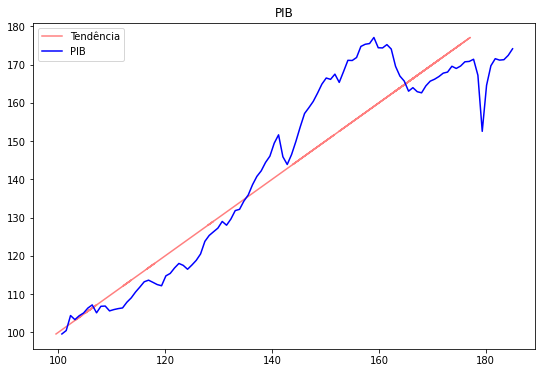

In [ ]:
# Gráfico PIB
#Plotando gráfico - PIB
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(Piby, pib, c="r", alpha=0.5, label="Tendência")
ax.plot(Pib_res.params['const']  + Pib_res.params['x1']*pib.index, Piby, c='b', label="PIB")
ax.legend(loc="upper left")
ax.set_title('PIB')

plt.show()

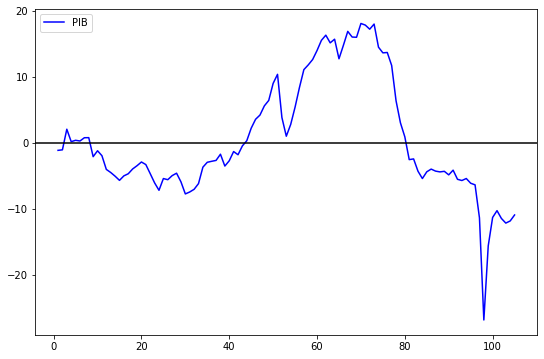

In [ ]:
# Gráfico PIB-ciclico 
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(PibX, pib_c, label="PIB", c="b")
plt.axhline(0,color="0")
ax.legend(loc="upper left")

plt.show()

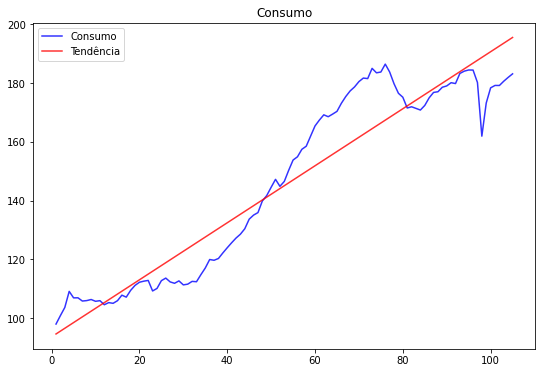

In [ ]:
# Gráfico Consumo
plt.figure(figsize=(9,6))
plt.plot(consumo.index,Cony, label="Consumo", c="b", alpha=0.8)
plt.plot(consumo.index,Con_res.params['const']  + Con_res.params['x1']*consumo.index, label="Tendência", c="r", alpha=0.8)
plt.title("Consumo")
plt.legend()
plt.show()

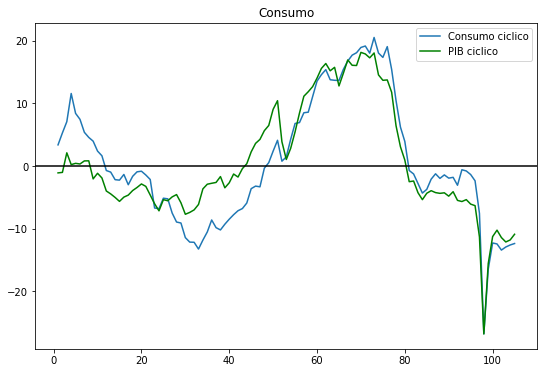

In [ ]:
# Gráfico Consumo-ciclico
#Plotando gráfico - Consumo Ciclico
plt.figure(figsize=(9,6))
plt.plot(consumo.index,con_c,label="Consumo ciclico")
plt.plot(consumo.index,pib_c,label="PIB ciclico",color="g")
plt.axhline(0,color="0")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Consumo")
plt.legend()
plt.show()

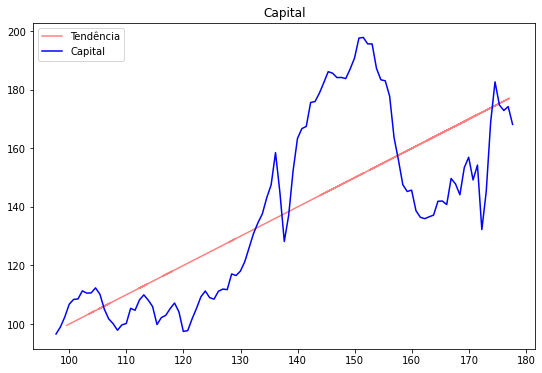

In [ ]:
# Gráfico Capital
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(Piby, pib, c="r", alpha=0.5, label="Tendência")
ax.plot(Cap_res.params['const']  + Cap_res.params['x1']*capital.index, Capy, c='b', label="Capital")
ax.legend(loc="upper left")
ax.set_title('Capital')

plt.show()

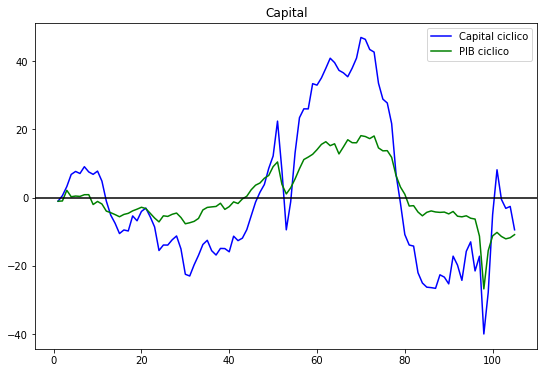

In [ ]:
# Gráfico Capital-ciclico
plt.figure(figsize=(9,6))
plt.plot(capital.index,Cap_c,label="Capital ciclico", c="b")
plt.plot(capital.index,pib_c,label="PIB ciclico",color="g")
plt.axhline(0,color="0")
plt.title("Capital")
plt.legend()
plt.show()

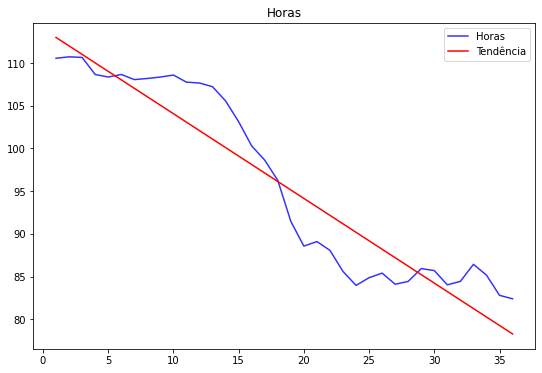

In [ ]:
# Gráfico Horas
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(Horas.index,Horas["Horas"], c="b", alpha=0.8, label="Horas")
ax.plot(Horas.index, Hr_res.params['const']  + Hr_res.params['x1']*Horas.index, c='r', label="Tendência")
ax.legend(loc="best")
ax.set_title('Horas')

plt.show()

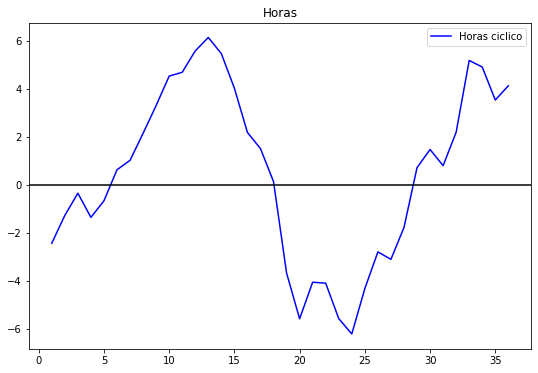

In [ ]:
# Gráfico Horas-ciclico
plt.figure(figsize=(9,6))
plt.plot(Horas.index,Hr_c,label="Horas ciclico", c="b")
plt.axhline(0,color="0")
plt.title("Horas")
plt.legend(loc="best")
plt.legend()
plt.show()

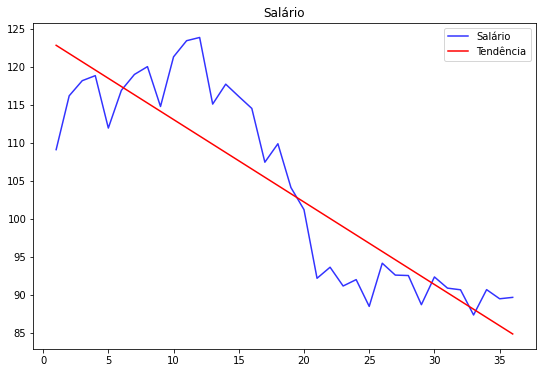

In [ ]:
# Gráfico Salários
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(Salário.index,Salário["Salário"], c="b", alpha=0.8, label="Salário")
ax.plot(Salário.index, Sal_res.params['const']  + Sal_res.params['x1']*Salário.index, c='r', label="Tendência")
ax.legend(loc="best")
ax.set_title('Salário')

plt.show()

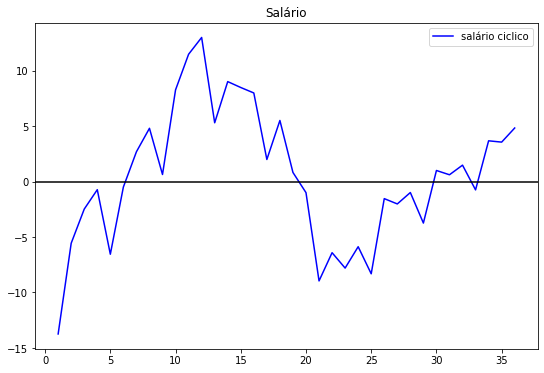

In [ ]:
# Gráfico Salários-ciclico

plt.figure(figsize=(9,6))
plt.plot(Salário.index,Sal_c,label="salário ciclico", c="b")
plt.axhline(0,color="0")
plt.title("Salário")
plt.legend(loc="best")
plt.legend()
plt.show()

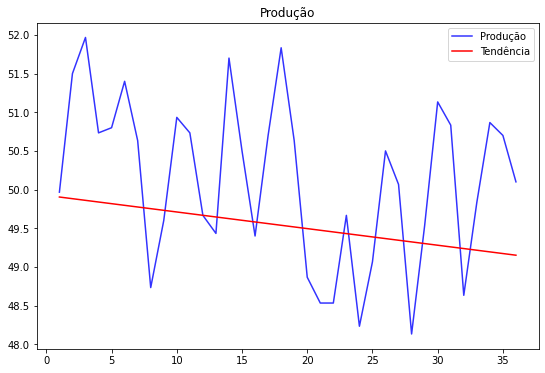

In [ ]:
# Gráfico Produção 
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(Produção.index,Produção["Produção"], c="b", alpha=0.8, label="Produção")
ax.plot(Produção.index, Prod_res.params['const']  + Prod_res.params['x1']*Produção.index, c='r', label="Tendência")
ax.legend(loc="best")
ax.set_title('Produção')

plt.show()

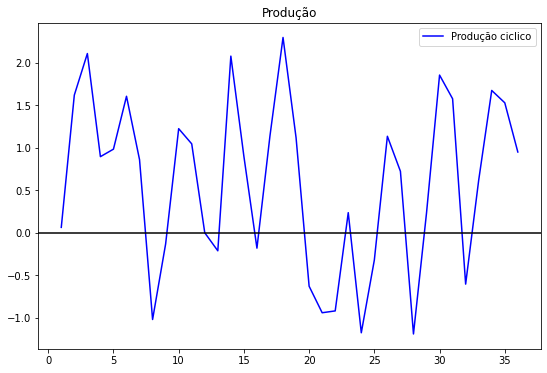

In [ ]:
# Gráfico Produção-ciclico

plt.figure(figsize=(9,6))
plt.plot(Produção.index,Prod_c,label="Produção ciclico", c="b")
plt.axhline(0,color="0")
plt.title("Produção")
plt.legend(loc="best")
plt.legend()
plt.show()

### Tabela dos resultados

In [ ]:
#Inserindo dados numa tabela
tabela_resul = pd.DataFrame()
tabela_resul["B0"] = [ 
                      Pib_res.params['const'],
                      Con_res.params['const'],
                      Cap_res.params['const'],
                      Hr_res.params['const'],
                      Sal_res.params['const'],
                      Prod_res.params['const']
                     ]

tabela_resul["B1"] = [ 
                      Pib_res.params['x1'],
                      Con_res.params['x1'],
                      Cap_res.params['x1'],
                      Hr_res.params['x1'],
                      Sal_res.params['x1'],
                      Prod_res.params['x1'] 
                     ]

tabela_resul["R2"] = [ 
                      Pib_res.rsquared,
                      Con_res.rsquared,
                      Cap_res.rsquared,
                      Hr_res.rsquared,
                      Sal_res.rsquared,
                      Prod_res.rsquared
                     ]
tabela_resul["R Std. Error ciclico(PIB)"] = [
                               pib_c.std()/pib_c.std(),
                               con_c.std()/pib_c.std(),
                               Cap_c.std()/pib_c.std(),
                               Hr_c.std()/pib_c.std(),
                               Sal_c.std()/pib_c.std(),
                               Prod_c.std()/pib_c.std(),
                              ]
tabela_resul["Corr ciclico(PIB)"] = [
                                     pib_c.corr(pib_c),
                                     con_c.corr(pib_c),
                                     Cap_c.corr(pib_c),
                                     Hr_c.corr(pib_c),
                                     Sal_c.corr(pib_c),
                                     Prod_c.corr(pib_c)
                                    ]
tabela_resul.index = ["PIB","Consumo", "Capital", "Horas", "Produção", "Salario"]

In [ ]:
dir(Pib_res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [ ]:
Pib_res.bse['const']

1.7592141892716575

In [ ]:
tabela_resul

,B0,B1,R2,R Std. Error ciclico(PIB),Corr ciclico(PIB)
PIB,99.831868,0.811259,0.885008,1.000000,1.000000
Consumo,93.704029,0.969106,0.900531,1.106929,0.906577
Capital,96.902198,0.768961,0.554523,2.369656,0.895959
Horas,113.993651,-0.992149,0.890952,0.408577,0.056900
Produção,123.923810,-1.085972,0.780930,0.687845,-0.012606
Salario,49.925397,-0.021493,0.051317,0.114508,0.176317


In [ ]:
# Letra D

#Importando Base
consPub = pd.read_excel("/content/drive/MyDrive/Lista 4 - macro 2/ipeadata[05-09-2022-09-20].xlsx")
# Renomeando colunas
consPub.columns = ["Data","Cons"]

In [ ]:
# Corrigindo as datas
consPub["Data"] = pd.DatetimeIndex(consPub["Data"])

In [ ]:
consPub

,Data,Cons
0,1996-01-01,99.147822
1,1996-02-01,100.744716
2,1996-03-01,104.244975
3,1996-04-01,88.569186
4,1997-01-01,100.315558
...,...,...
101,2021-02-01,143.630713
102,2021-03-01,145.052095
103,2021-04-01,146.252249
104,2022-01-01,146.051835


In [ ]:
consPub.index = pd.RangeIndex(start=1,stop=len(consPub)+1,step=1)

In [ ]:
# Estimando a regressão Consumo Pub.
consPy = consPub['Cons']
consPx = consPub.index
# adicionando constante
x = sm.add_constant(consPx)
 
# Criando o modelo 
consPub_res = sm.OLS(consPy.astype(int), x.astype(int)).fit()
# summary table
print(consPub_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cons   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     700.8
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           5.14e-48
Time:                        01:02:44   Log-Likelihood:                -351.29
No. Observations:                 106   AIC:                             706.6
Df Residuals:                     104   BIC:                             711.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.5644      1.314     75.002      0.0

In [ ]:
#Componente ciclico -  Consumo Pub.
consPub_c = consPub['Cons'] - (consPub_res.params['const']  + consPub_res.params['x1']*consPub.index)

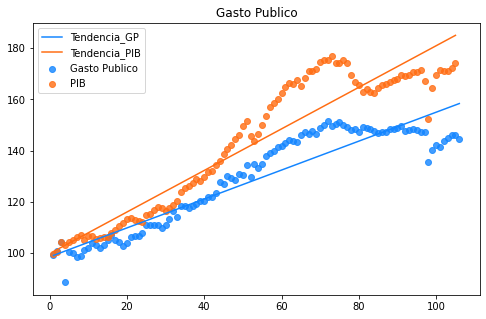

In [ ]:
#Plotando gráfico - consPublico
plt.figure(figsize=(8,5))
plt.scatter(consPub.index,consPub["Cons"], label="Gasto Publico", c="#1385ff", alpha=0.8)
plt.plot(consPub.index,((consPub_res.params['const']  + consPub_res.params['x1']*consPub.index)), label="Tendencia_GP", c="#1385ff")
plt.scatter(pib.index,pib, label="PIB", c="#ff6d13", alpha=0.8)
plt.plot(pib.index,(Pib_res.params['const']  + Pib_res.params['x1']*pib.index), label="Tendencia_PIB", c="#ff6d13")
plt.title("Gasto Publico")
plt.legend()
plt.show()


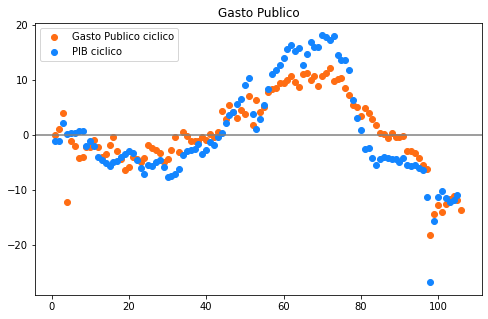

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(consPub.index,consPub_c,label="Gasto Publico ciclico", c="#ff6d13")
plt.scatter(pib.index,pib_c,label="PIB ciclico",color="#1385ff")
plt.axhline(0,color="grey")
plt.xlabel="Trimestres; T = 1 = 1996 T1"
plt.title("Gasto Publico")
plt.legend()
plt.show()

Os gastos do governo são prociclicos em relação ao PIB